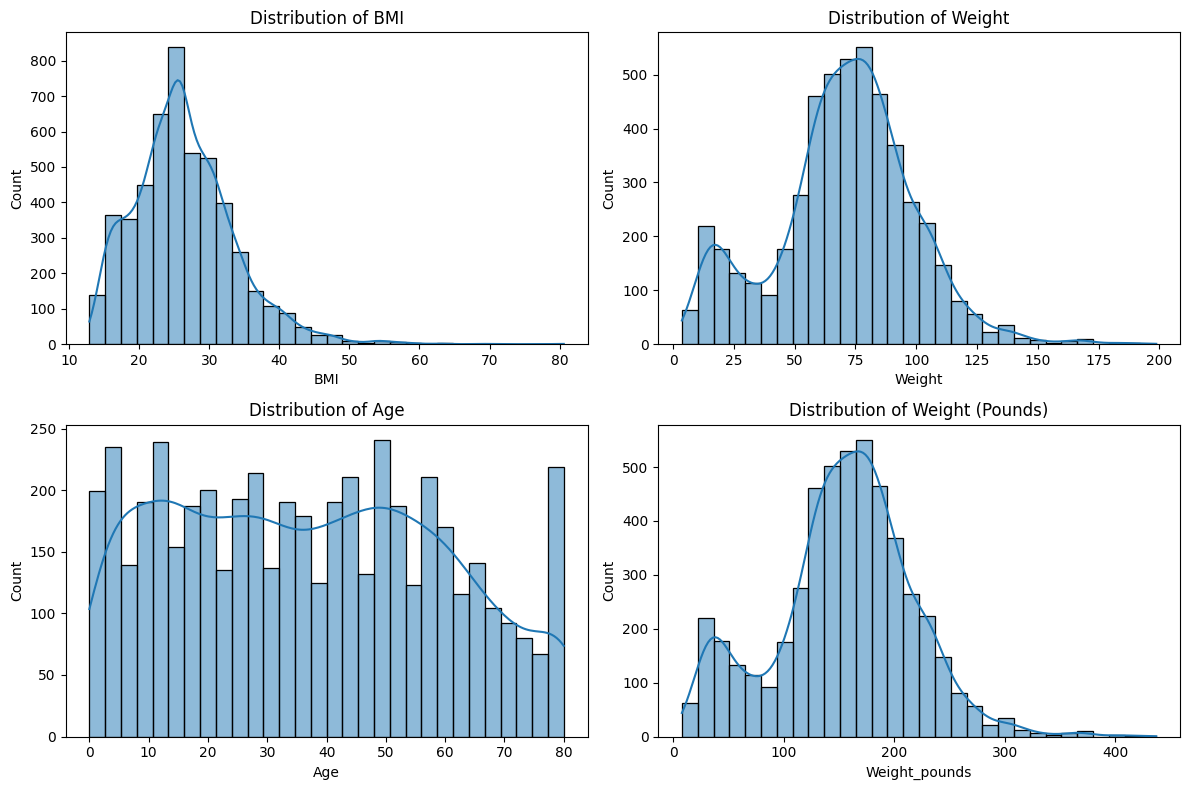

Mean pulse rate: 73.3992
Range of Diastolic BP: 0.0-116.0
Income Variance: 1040474158.8317664
Income Standard Deviation: 32256.381676061657


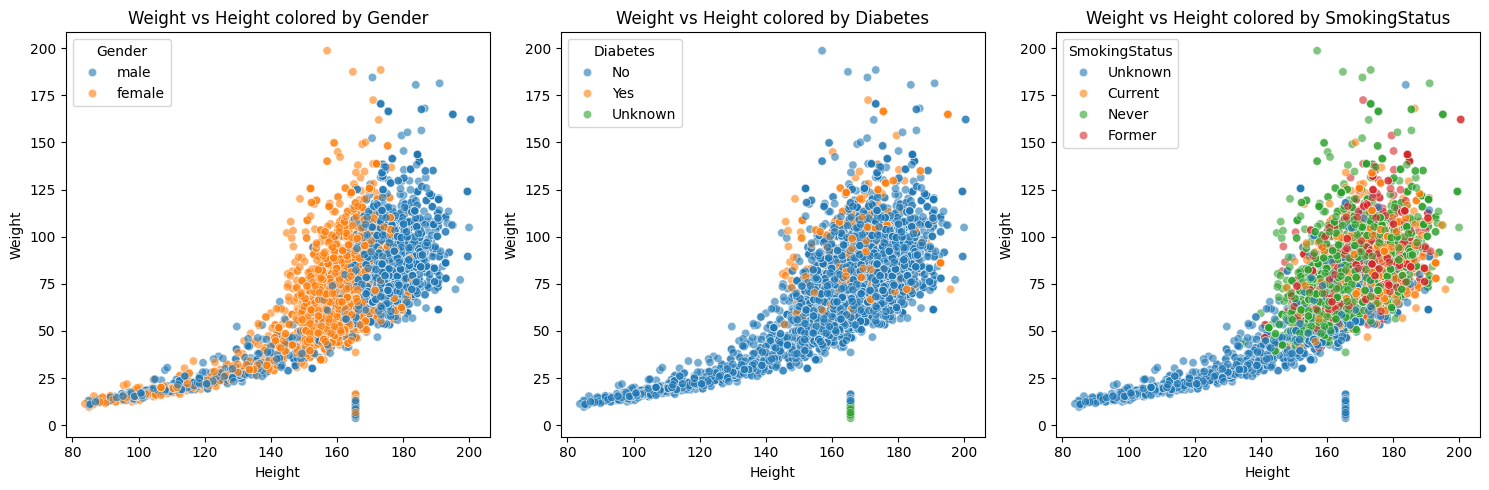

P-value for Age vs Gender: 0.0802033026651036
P-value for BMI vs Diabetes: 'Diabetes' has more than two unique values.
P-value for Alcohol Consumption vs Relationship Status: 'RelationshipStatus' has more than two unique values.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load dataset
url = "https://raw.githubusercontent.com/HackBio-Internship/public_datasets/main/R/nhanes.csv"
df = pd.read_csv(url)

# Step 1: Handle Missing Values (Filling with 0 might not always be the best approach)
df.fillna(df.median(numeric_only=True), inplace=True)  # Fill numeric missing values with median
df.fillna("Unknown", inplace=True)  # Fill categorical missing values with 'Unknown'

# Step 2: Visualizing BMI, Weight, Weight in pounds, and Age
plt.figure(figsize=(12, 8))
for i, col in enumerate(["BMI", "Weight", "Age"]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")

df["Weight_pounds"] = df["Weight"] * 2.2  # Convert weight to pounds
plt.subplot(2, 2, 4)
sns.histplot(df["Weight_pounds"], bins=30, kde=True)
plt.title("Distribution of Weight (Pounds)")

plt.tight_layout()
plt.show()

# Step 3: Mean Pulse Rate
if "Pulse" in df.columns:
    mean_pulse = df["Pulse"].mean()
    print("Mean pulse rate:", mean_pulse)
else:
    print("Column 'Pulse' not found.")

# Step 4: Range of Diastolic Blood Pressure
if "BPDia" in df.columns:
    dbp_min = df["BPDia"].min()
    dbp_max = df["BPDia"].max()
    print(f"Range of Diastolic BP: {dbp_min}-{dbp_max}")
else:
    print("Column 'BPDia' not found.")

# Step 5: Variance and Standard Deviation of Income
if "Income" in df.columns:
    income_variance = df["Income"].var()
    income_std = df["Income"].std()
    print("Income Variance:", income_variance)
    print("Income Standard Deviation:", income_std)
else:
    print("Column 'Income' not found.")

# Step 6: Scatter Plots for Weight vs Height
plt.figure(figsize=(15, 5))
for i, hue in enumerate(["Gender", "Diabetes", "SmokingStatus"]):
    if hue in df.columns:
        plt.subplot(1, 3, i + 1)
        sns.scatterplot(data=df, x="Height", y="Weight", hue=hue, alpha=0.6)
        plt.title(f"Weight vs Height colored by {hue}")
plt.tight_layout()
plt.show()

# Step 7: Conducting t-tests
def perform_ttest(var1, var2):
    if var1 in df.columns and var2 in df.columns:
        unique_vals = df[var2].dropna().unique()
        if len(unique_vals) == 2:  # Ensure only two groups exist
            group1 = df[df[var2] == unique_vals[0]][var1]
            group2 = df[df[var2] == unique_vals[1]][var1]
            stat, p_value = ttest_ind(group1, group2, nan_policy='omit')
            return p_value
        else:
            return f"'{var2}' has more than two unique values."
    else:
        return f"One or both columns '{var1}', '{var2}' not found."

# Age vs Gender
p_val_age_gender = perform_ttest("Age", "Gender")
print("P-value for Age vs Gender:", p_val_age_gender)

# BMI vs Diabetes
p_val_bmi_diabetes = perform_ttest("BMI", "Diabetes")
print("P-value for BMI vs Diabetes:", p_val_bmi_diabetes)

# Alcohol Year vs Relationship Status
p_val_alcohol_relationship = perform_ttest("AlcoholYear", "RelationshipStatus")
print("P-value for Alcohol Consumption vs Relationship Status:", p_val_alcohol_relationship)